In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

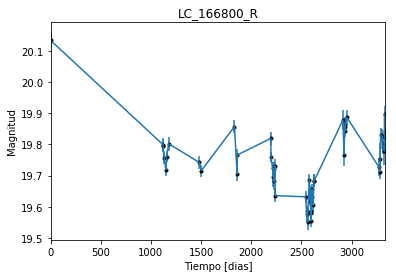

In [2]:
data = np.genfromtxt('LC_166800_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_166800_R')
plt.savefig("LC_166800_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

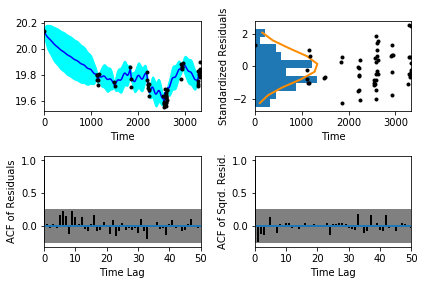

In [5]:
sample.assess_fit()

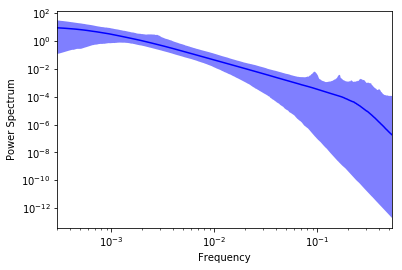

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

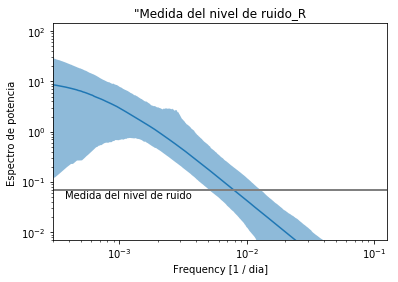

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_166800_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_166800_R')

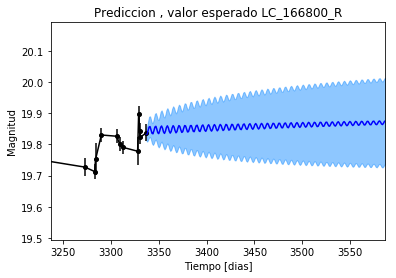

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_166800_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_166800_R')

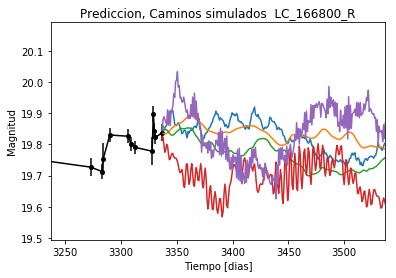

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_166800_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


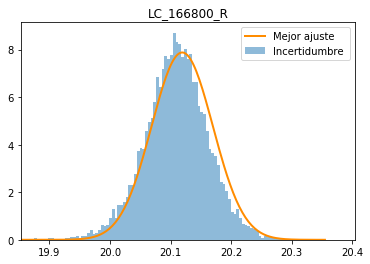

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_166800_R')
plt.savefig("Mejor_ajuste_LC_166800_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_166800_R')

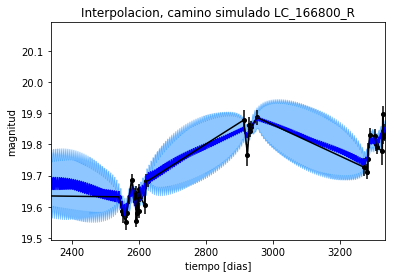

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_166800_R')

Text(0.5,1,'Interpolacion, camino simulado LC_166800_R')

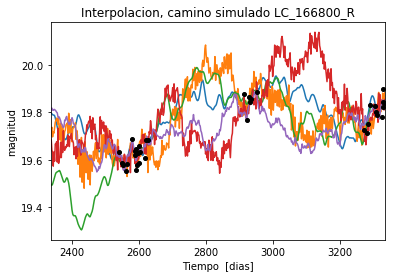

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_166800_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 342.486755003
Median: 0.0189405283618
Standard deviation: 0.184981444696
68% credibility interval: [ 0.00235621  0.15086153]
95% credibility interval: [  4.42873082e-04   7.57730340e-01]
99% credibility interval: [  3.19218020e-04   9.68585841e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 203.051581782
Median: 0.0136557311963
Standard deviation: 0.134469150459
68% credibility interval: [ 0.00109086  0.0912189 ]
95% credibility interval: [  3.54095716e-04   5.10011333e-01]
99% credibility interval: [  3.09148234e-04   9.61288412e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 297.916476219
Median: 0.146933595608
St

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 357.887242004
Median: 104.92043409
Standard deviation: 2.0252470025
68% credibility interval: [ 102.61868004  106.54559769]
95% credibility interval: [ 100.02159783  107.8373159 ]
99% credibility interval: [  97.95601979  108.21210899]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 369.767769967
Median: 1.77457510439
Standard deviation: 2.64786632486
68% credibility interval: [ 0.36055829  5.35801903]
95% credibility interval: [ 0.0745899   8.97002898]
99% credibility interval: [  0.02200732  12.0842853 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1116.25476488
Median: 3.70562601252
Standard deviation: 12.7576545723
68% credibility interval: [  0.62770762  20.99439664]
95% credibility interval: [  0.04677145 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20027.4721413
Median: 3.53131279859e-20
Standard deviation: 9.15701485473e+79
68% credibility interval: [  2.06244710e-70   1.70925054e+01]
95% credibility interval: [  3.71599214e-103   5.63741473e+065]
99% credibility interval: [  1.63200399e-115   7.86944767e+068]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1226.78676096
Median: 19.8162143606
Standard deviation: 0.0727902601033
68% credibility interval: [ 19.7593035   19.89166034]
95% credibility interval: [ 19.69232973  19.98309962]
99% credibility interval: [ 19.63820897  20.04967219]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 570.913107906
Median: 0.224886167002
Standard deviation: 0.279876579291
68% credibility interval: [ 0.01905517  0.64670836]
95% credibility interval: [ 0.          0.96110225]
99% credibility interval: [ 0.          1.04687325]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 570.913107906
Median: 0.224886167002
Standard deviation: 0.279876579291
68% credibility interval: [ 0.01905517  0.64670836]
95% credibility interval: [ 0.          0.96110225]
99% credibility interval: [ 0.          1.04687325]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1114.65514337
Median: 0.0
Standard deviation: 0.000530683969899
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 357.887242004
Median: 104.92043409
Standard deviation: 2.0252470025
68% credibility interval: [ 102.61868004  106.54559769]
95% credibility interval: [ 100.02159783  107.8373159 ]
99% credibility interval: [  97.95601979  108.21210899]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1495.10336512
Median: 0.0225346542715
Standard deviation: 0.0131572184487
68% credibility interval: [ 0.01417004  0.03559994]
95% credibility interval: [ 0.00968891  0.05681419]
99% credibility interval: [ 0.00767225  0.0811701 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 579.036802606
Median: 1.229618093
Standard deviation: 0.26056354507
68% credibility interval: [ 0.99671979  1.52135141]
95% credibility interval: [ 0.79664025  1.83244332]
99% credibility interval: [ 0.71497626  1.95194033]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 693.104903744
Median: 0.0164331192413
Standard deviation: 0.411545395176
68% credibility interval: [  6.32017589e-05   2.00798479e-01]
95% credibility interval: [  3.13154185e-67   1.29616458e+00]
99% credibility interval: [  5.87480862e-70   3.12302502e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 342.486755003
Median: (-0.119006849513-1.37496121687j)
Standard deviation: 2.10790364714
68% credibility interval: [-0.94789092-2.43735241j -0.01480451-0.63840999j]
95% credibility interval: [ -4.76096014e+00+0.j          -2.78265364e-03-1.47507756j]
99% credibility interval: [ -6.08580433e+00+0.j          -2.00570597e-03-0.02665923j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 203.051581782
Median: (-0.0858014896111+1.62315229136j)
Standard deviation: 1.95095536496
68% credibility interval: [-0.57314525+0.j -0.00685405+0.j]
95% credibility interval: [ -3.20449572e+00+0.70764783j  -2.22484900e-03+0.j        ]
99% credibility interval: [ -6.03995323e+00+0.88499737j  -1.94243564e-03+0.07629661j]
Posterior summary for